### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Suma de las ventas de cada tienda
ventas_tienda1 = tienda1['Precio'].sum()
ventas_tienda2 = tienda2['Precio'].sum()
ventas_tienda3 = tienda3['Precio'].sum()
ventas_tienda4 = tienda4['Precio'].sum()

# Diccionario con las ventas de cada tienda
ventas_por_tienda = {
    'Tienda 1': ventas_tienda1,
    'Tienda 2': ventas_tienda2,
    'Tienda 3': ventas_tienda3,
    'Tienda 4': ventas_tienda4
}

# Tienda con más ventas
tienda_mas_ventas = max(ventas_por_tienda, key=ventas_por_tienda.get)
ventas_maximas = ventas_por_tienda[tienda_mas_ventas]

print("Ventas totales por tienda:")
for tienda, ventas in ventas_por_tienda.items():
    print(f"{tienda}: {ventas}")
print(f"La tienda que más vende es: {tienda_mas_ventas} con un total de {ventas_maximas} en ventas.")


Ventas totales por tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0
La tienda que más vende es: Tienda 1 con un total de 1150880400.0 en ventas.


# 2. Ventas por categoría


Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Precio, dtype: int64


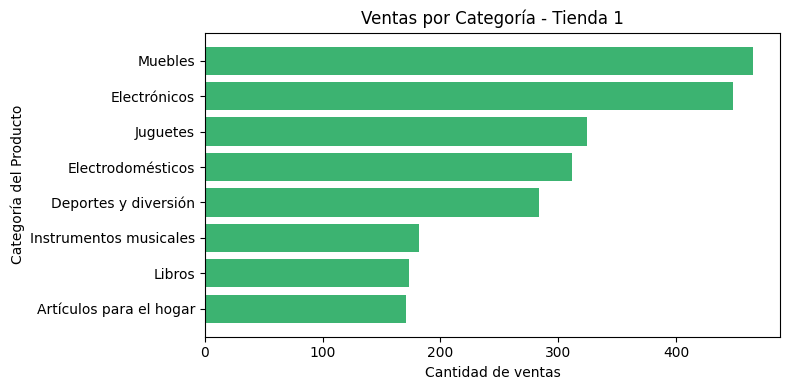


Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Precio, dtype: int64


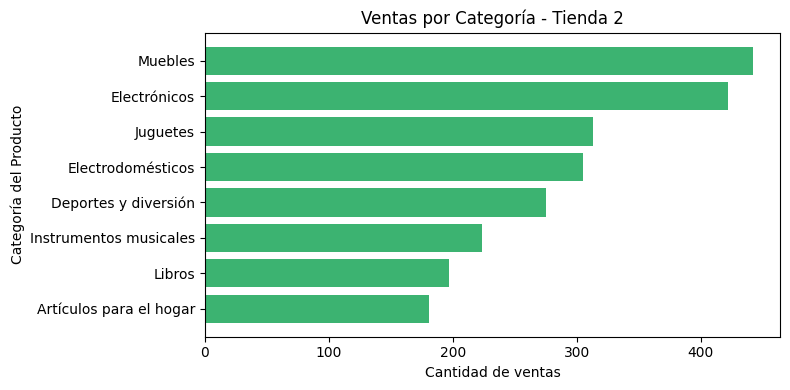


Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Precio, dtype: int64


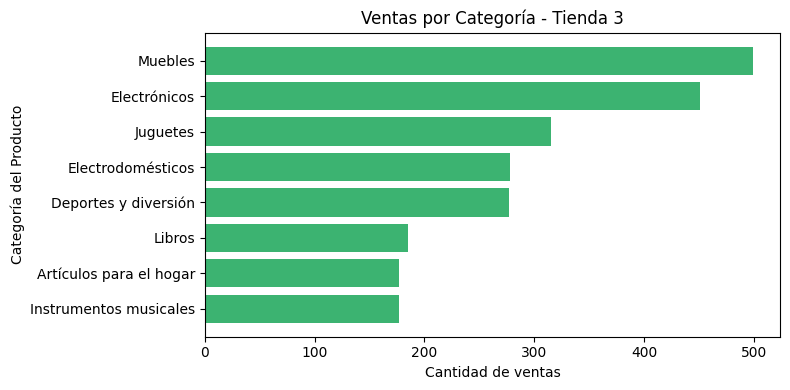


Tienda 4:
Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes                   338
Deportes y diversión       277
Electrodomésticos          254
Artículos para el hogar    201
Libros                     187
Instrumentos musicales     170
Name: Precio, dtype: int64


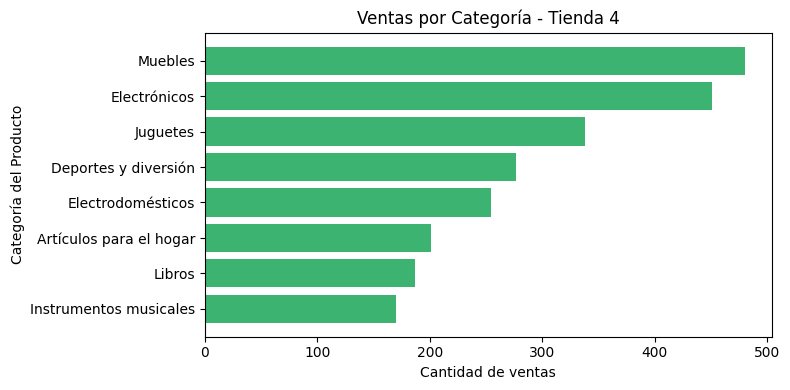

In [ ]:
# Función para agrupar y visualizar ventas por categoría
def analizar_ventas_por_categoria(df, nombre_tienda):
    ventas_categoria = df.groupby('Categoría del Producto')['Precio'].count().sort_values(ascending=False)
    print(f"\n{nombre_tienda}:")
    print(ventas_categoria)

    # Visualización
    plt.figure(figsize=(8, 4))
    plt.barh(ventas_categoria.index, ventas_categoria.values, color='mediumseagreen')
    plt.title(f"Ventas por Categoría - {nombre_tienda}")
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Categoría del Producto")
    plt.gca().invert_yaxis()  # Opcional: para que la categoría con más ventas quede arriba
    plt.tight_layout()
    plt.show()

analizar_ventas_por_categoria(tienda1, "Tienda 1")
analizar_ventas_por_categoria(tienda2, "Tienda 2")
analizar_ventas_por_categoria(tienda3, "Tienda 3")
analizar_ventas_por_categoria(tienda4, "Tienda 4")




# 3. Calificación promedio de la tienda


Promedio de evaluación por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


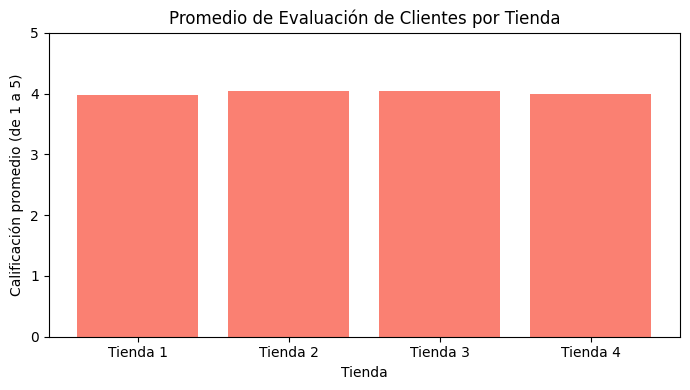

In [ ]:
# Diccionario con los promedios
promedios_calificacion = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

print("Promedio de evaluación por tienda:")
for tienda, promedio in promedios_calificacion.items():
    print(f"{tienda}: {promedio:.2f}")

# Visualización
plt.figure(figsize=(7,4))
plt.bar(promedios_calificacion.keys(), promedios_calificacion.values(), color='salmon')
plt.ylim(0,5)
plt.title("Promedio de Evaluación de Clientes por Tienda")
plt.ylabel("Calificación promedio (de 1 a 5)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

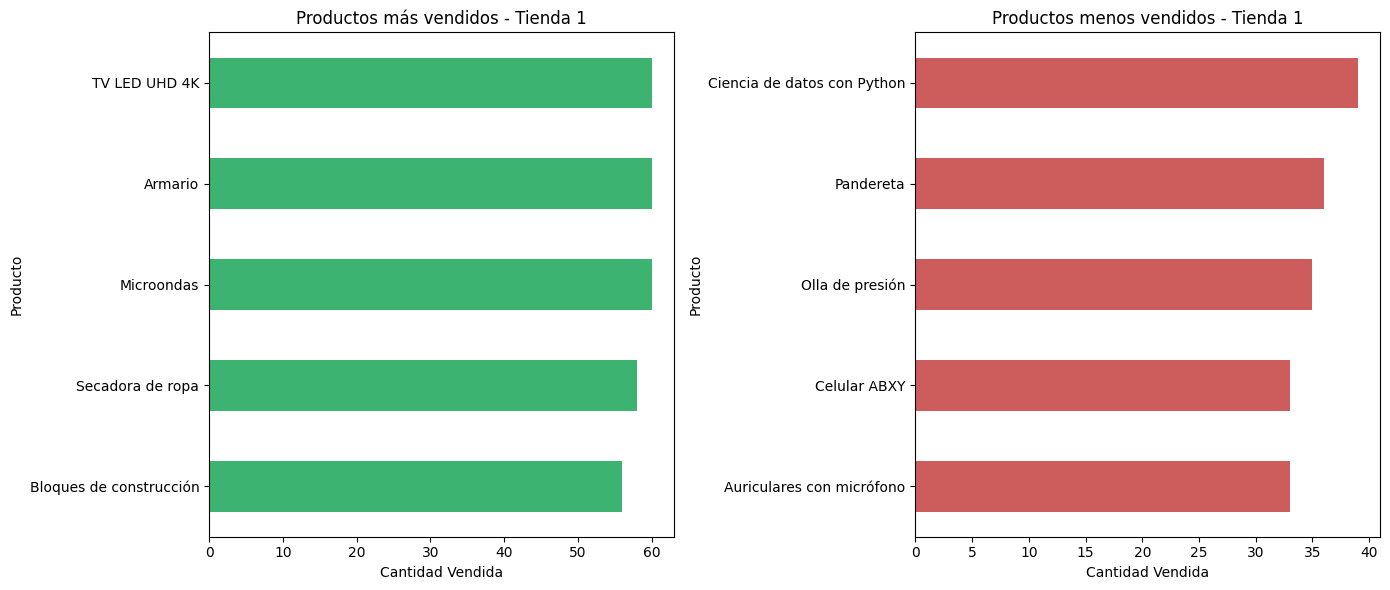


🔝 Productos más vendidos en Tienda 1:
Producto
Armario                    60
Microondas                 60
TV LED UHD 4K              60
Secadora de ropa           58
Bloques de construcción    56
Name: Precio, dtype: int64

🔻 Productos menos vendidos en Tienda 1:
Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
Name: Precio, dtype: int64


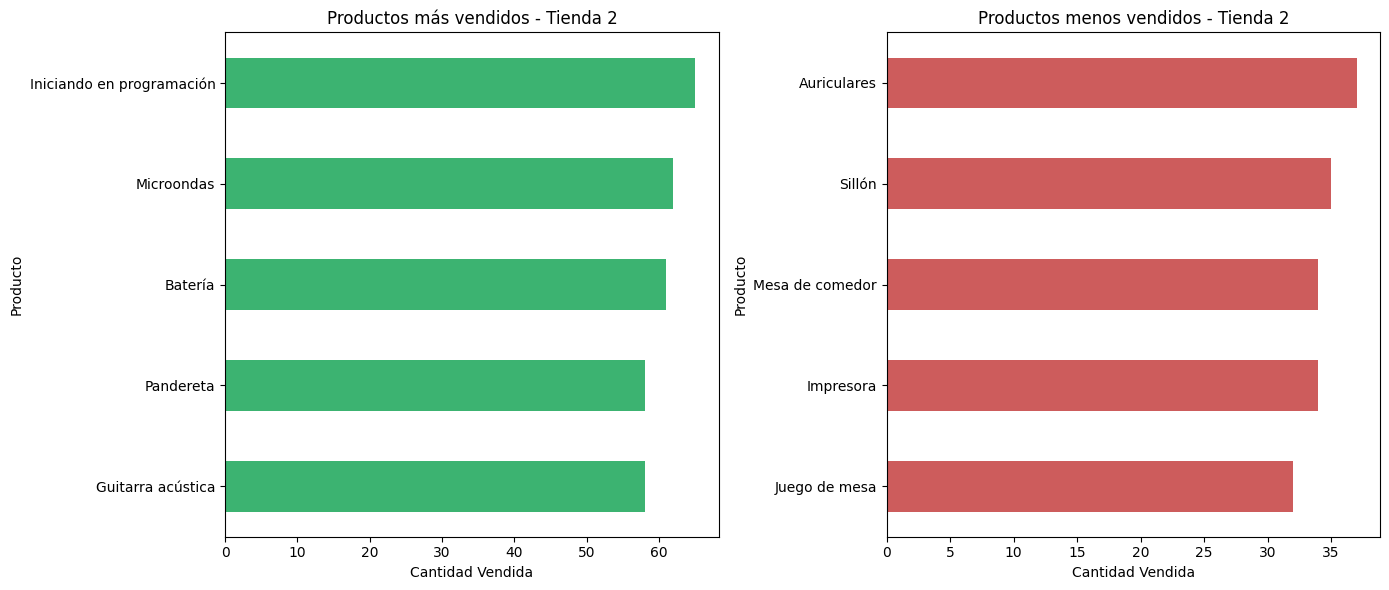


🔝 Productos más vendidos en Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: Precio, dtype: int64

🔻 Productos menos vendidos en Tienda 2:
Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
Name: Precio, dtype: int64


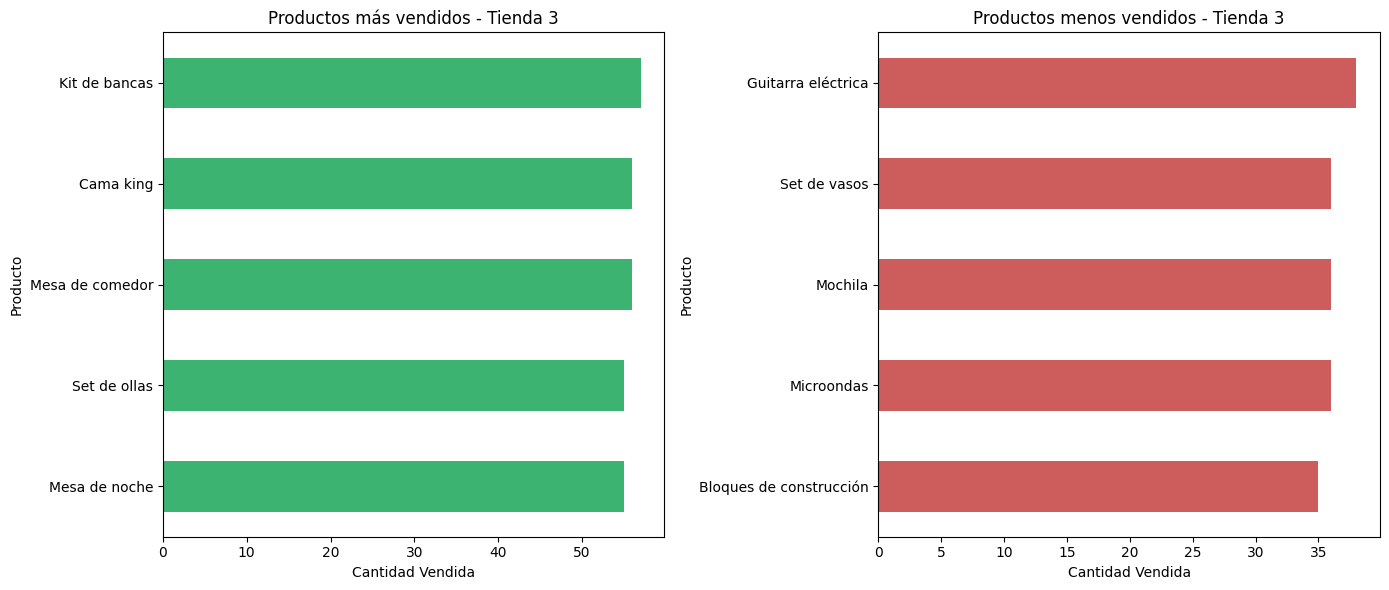


🔝 Productos más vendidos en Tienda 3:
Producto
Kit de bancas      57
Cama king          56
Mesa de comedor    56
Mesa de noche      55
Set de ollas       55
Name: Precio, dtype: int64

🔻 Productos menos vendidos en Tienda 3:
Producto
Bloques de construcción    35
Microondas                 36
Mochila                    36
Set de vasos               36
Guitarra eléctrica         38
Name: Precio, dtype: int64


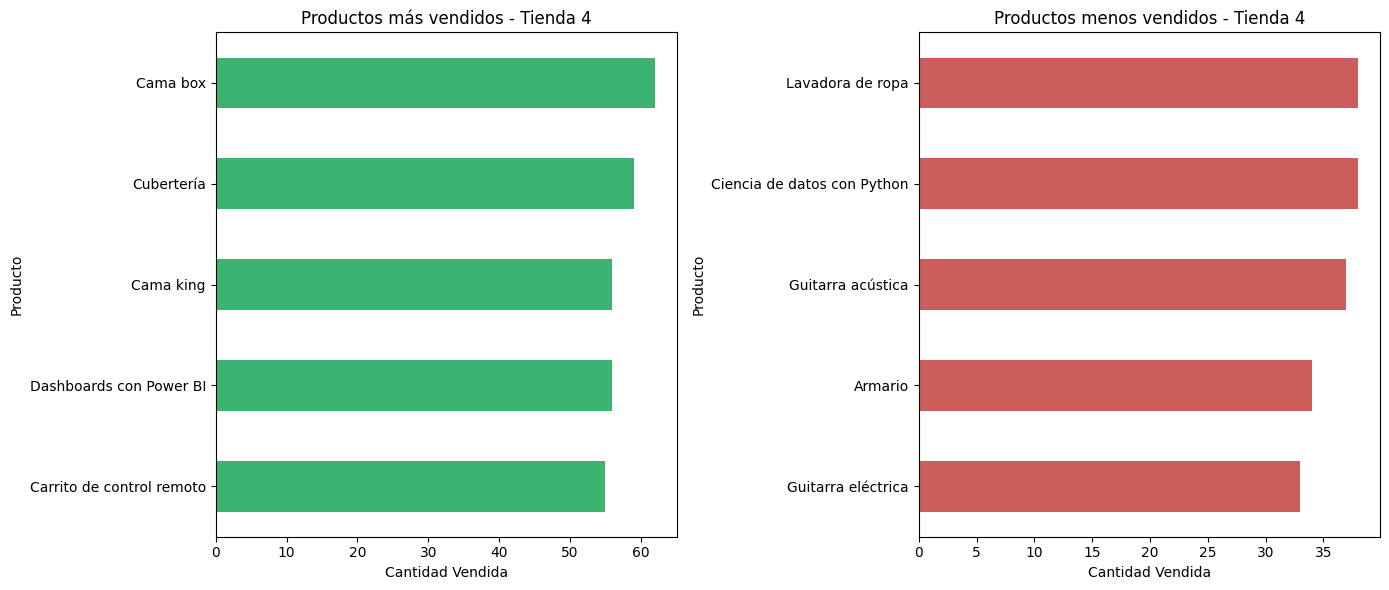


🔝 Productos más vendidos en Tienda 4:
Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Name: Precio, dtype: int64

🔻 Productos menos vendidos en Tienda 4:
Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
Lavadora de ropa               38
Name: Precio, dtype: int64


In [ ]:
def analizar_ventas_productos(tienda_data, tienda_nombre):
    ventas_producto = tienda_data.groupby('Producto')['Precio'].count()
    productos_mas_vendidos = ventas_producto.nlargest(5)
    productos_menos_vendidos = ventas_producto.nsmallest(5)

    plt.figure(figsize=(14, 6))

    # Productos más vendidos
    plt.subplot(1, 2, 1)
    productos_mas_vendidos.sort_values().plot(
        kind='barh',
        color='mediumseagreen',
        title=f'Productos más vendidos - {tienda_nombre}'
    )
    plt.xlabel('Cantidad Vendida')

    # Productos menos vendidos
    plt.subplot(1, 2, 2)
    productos_menos_vendidos.sort_values().plot(
        kind='barh',
        color='indianred',
        title=f'Productos menos vendidos - {tienda_nombre}'
    )
    plt.xlabel('Cantidad Vendida')

    plt.tight_layout()
    plt.show()

    # Impresión de tablas
    print(f"\n🔝 Productos más vendidos en {tienda_nombre}:\n{productos_mas_vendidos}")
    print(f"\n🔻 Productos menos vendidos en {tienda_nombre}:\n{productos_menos_vendidos}")

# Análisis a todas las tiendas
analizar_ventas_productos(tienda1, "Tienda 1")
analizar_ventas_productos(tienda2, "Tienda 2")
analizar_ventas_productos(tienda3, "Tienda 3")
analizar_ventas_productos(tienda4, "Tienda 4")



Costo de envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


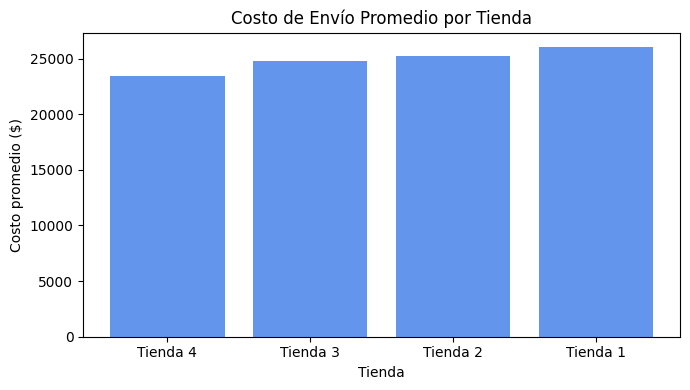

In [ ]:
# Diccionario con el costo de envío promedio por tienda
costo_envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

print("Costo de envío promedio por tienda:")
for tienda_nombre, costo in costo_envio_promedio.items():
    print(f"{tienda_nombre}: ${costo:.2f}")

# Visualización ordenada
costo_envio_ordenado = dict(sorted(costo_envio_promedio.items(), key=lambda x: x[1]))

plt.figure(figsize=(7,4))
plt.bar(costo_envio_ordenado.keys(), costo_envio_ordenado.values(), color='cornflowerblue')
plt.title("Costo de Envío Promedio por Tienda")
plt.ylabel("Costo promedio ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()


# 6. Informe final

**1. Introducción**
<br><br>
El presente informe tiene como propósito analizar el rendimiento de las cuatro tiendas de la cadena Alura Store para determinar cuál de ellas debería ser vendida con el fin de liberar capital e iniciar un nuevo emprendimiento. El análisis se llevó a cabo utilizando datos de ventas, categorías de productos, calificaciones de clientes, productos más y menos vendidos, y costos de envío. A partir de esta evaluación integral, se identifica la tienda con menor desempeño general y se realiza una recomendación final respaldada por datos objetivos y visualizaciones.
<br><br><br>
**2. Análisis de Resultados**
<br><br>
2.1. Ingresos Totales por Tienda:<br>
Se calculó el total de ventas (suma de precios de productos vendidos) para cada tienda. Los resultados muestran una clara diferencia en facturación:

- Tienda 1 lidera en ingresos, seguida por Tienda 2 y Tienda 3.

- Tienda 4 obtuvo los ingresos más bajos.

2.2. Categorías de Productos Más Vendidas:<br>
Cada tienda mostró una concentración de ventas en ciertas categorías:

- Tienda 2 y Tienda 3 tienen una distribución más equilibrada, con varias categorías relevantes.

- Tienda 4 tiene menor diversidad, y depende en gran medida de 1 o 2 categorías específicas.

2.3. Calificaciones Promedio de Clientes:<br>
Se evaluó el promedio de satisfacción de los clientes:

- Tienda 3 obtuvo la mejor calificación promedio.

- Tienda 1 mostró la calificación más baja, lo que puede indicar problemas de atención, logística o calidad del producto.


2.4. Productos Más y Menos Vendidos:<br>
- Tienda 2 y Tienda 1 presentan productos muy bien posicionados, con alto volumen de ventas.

- Tienda 4, por otro lado, tiene varios productos con muy baja rotación, lo que representa ineficiencias de inventario.

Esto refuerza la falta de dinamismo comercial en la Tienda 4.

2.5. Costo de Envío Promedio:<br>
- Tienda 4 tiene los costos de envío promedio más bajos, lo que puede alentar ventas.

- Tienda 1 y Tienda 2 presentan costos más altos.

Un mayor costo logístico afecta directamente la rentabilidad neta de la tienda.
<br><br><br>
**3. Conclusión y Recomendación**<br><br>
Con base en los factores analizados, se recomienda que el Sr. Juan venda la Tienda 1.

Justificación:<br>
- Aunque tenga el mayor volumen de ventas entre las cuatro tiendas, sólo es un 10,8% mas grande que la tienda de menor facturación (tienda 4).

- Menor diversidad de categorías, compaarable a la tienda 4 en ese sentido.

- La peor calificación promedio de los clientes, lo que indica posibles deficiencias en experiencia de usuario o logística.

- Tiene los costos de envío más altos, lo cual reduce márgenes y competitividad.

En contraste, las tiendas 2, 3 y 4 presentan mejores desempeños globales en costos operativos y percepción del cliente. En especial, Tienda 2 destaca como la mejor equilibrada en todos los indicadores en general.
<br><br><br>
**4. Recomendación Final**<br><br>
Vender Tienda 1 y conservar las otras tres tiendas, priorizando su optimización y expansión con el capital liberado.